In [37]:
# Random Forest Model
import numpy as np 
import matplotlib as mpl
import pandas as pd
import matplotlib.pyplot as plt
import os

In [20]:
os.getcwd()
train = pd.read_csv("train_data.csv")
# print(train)

In [21]:
# To find how many values are null in which column
NAs = pd.concat([train.isnull().sum()], axis = 1, keys = ["Train"])
NAs[NAs.sum(axis=1)>0]

,Train
traffic_incident,29


In [24]:
for col in train.dtypes[train.dtypes == "object"].index:
    for_dummy = train.pop(col)
    train = pd.concat([train,pd.get_dummies(for_dummy,prefix=col)],axis = 1)
    # print(col)
    
train.head()

,camera_id,latitude,longitude,timestamp,average_speed (km/h),vehicle_count,length_of_road,traffic_density,Jam,region_Central,...,express_way_ECP,express_way_KJE,express_way_KPE,express_way_MCE,express_way_PIE,express_way_SLE,express_way_TPE,traffic_incident_Accident,traffic_incident_Heavy Traffic,traffic_incident_Roadwork
0,1001,1.295313,103.87115,2.022100e+13,42,45,220,0.20,1,0,...,0,0,1,0,0,0,0,0,1,0
1,1002,1.319541,103.87856,2.022100e+13,5,46,184,0.25,1,0,...,1,0,0,0,0,0,0,0,0,1
2,1003,1.323957,103.87286,2.022100e+13,45,12,75,0.16,1,0,...,0,0,1,0,0,0,0,0,0,1
3,1004,1.319536,103.87507,2.022100e+13,70,48,166,0.29,1,0,...,0,1,0,0,0,0,0,1,0,0
4,1005,1.363520,103.90539,2.022100e+13,26,3,200,0.02,1,0,...,0,0,0,0,0,1,0,0,0,1


In [25]:
labels = train.pop("Jam")

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
y_pred = rf.predict(x_test)

In [34]:
from sklearn.metrics import roc_curve, auc
false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(false_positive_rate,true_positive_rate)
roc_auc
# roc_auc = area under curve, the closer it is to 1 the more accurate the model

0.96

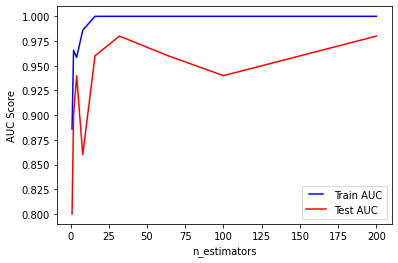

In [38]:
n_estimators = [1,2,4,8,16,32,64,100,200]
train_results = []
test_results = [] 
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators = estimator, n_jobs=-1)
    rf.fit(x_train,y_train)
    train_pred = rf.predict(x_train)
    false_positive_rate, true_positive_rate , thresholds =roc_curve(y_train,train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred =rf.predict(x_test)
    false_positive_rate, true_positive_rate , thresholds =roc_curve(y_test,y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators,train_results, "b", label = "Train AUC")
line2, = plt.plot(n_estimators,test_results, "r", label = "Test AUC")
plt.legend(handler_map={line1:HandlerLine2D(numpoints =2)})
plt.ylabel("AUC Score")
plt.xlabel("n_estimators")
plt.show()

# From the graph, we can see that the best model iterations is when n=32